In [2]:
from kaggle import KaggleApi
import re
import pandas as pd
pd.options.display.max_colwidth = None
import pathlib

In [3]:
api = KaggleApi()
api.authenticate()

In [4]:
if not pathlib.Path("data/the-reddit-irl-dataset-comments.csv").exists() or not pathlib.Path("data/the-reddit-irl-dataset-posts.csv").exists():
    api.dataset_download_files("pavellexyr/the-reddit-irl-dataset", path="data", quiet=False, unzip=True)

# Posts

In [5]:
df_posts = pd.read_csv("data/the-reddit-irl-dataset-posts.csv", usecols=["id", "permalink", "score", "url"], engine="c")

In [6]:
df_posts.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362747 entries, 0 to 3362746
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   id         object
 1   permalink  object
 2   url        object
 3   score      int64 
dtypes: int64(1), object(3)
memory usage: 814.7 MB


In [7]:
df_posts.sample(5)

,id,permalink,url,score
417919,pdol0q,https://old.reddit.com/r/me_irl/comments/pdol0q/me_irl/,https://i.redd.it/wq77orl1h7k71.jpg,1
1667162,abu80z,https://old.reddit.com/r/me_irl/comments/abu80z/me_irl/,https://imgur.com/XJH2pur,14
3004140,4xxkxc,https://old.reddit.com/r/me_irl/comments/4xxkxc/me_irl/,https://i.reddituploads.com/c0bf2185b42e4d2eb98c9500b2a7b10c?fit=max&amp;h=1536&amp;w=1536&amp;s=2b5acb7f6f3c6096d75ab1f1f0ea2993,0
1145914,cc6r5a,https://old.reddit.com/r/me_irl/comments/cc6r5a/help/,NaN,1
1994678,94303c,https://old.reddit.com/r/me_irl/comments/94303c/me_irl/,https://i.redd.it/y22008fvqqd11.jpg,201


<AxesSubplot:title={'center':'Are there null permalinks?'}, ylabel='permalink'>

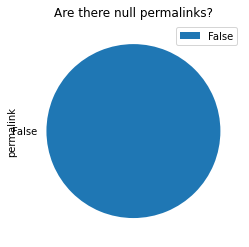

In [8]:
df_posts.permalink.isnull().value_counts().plot(kind="pie", legend=True, title="Are there null permalinks?")

<AxesSubplot:title={'center':'Are there null scores?'}, ylabel='score'>

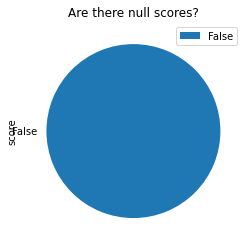

In [9]:
df_posts.score.isnull().value_counts().plot(kind="pie", legend=True, title="Are there null scores?")

# Comments

In [10]:
df_comments = pd.read_csv("data/the-reddit-irl-dataset-comments.csv", usecols=["permalink", "sentiment", "body"], engine="c")

In [11]:
df_comments["post_id"] = df_comments.permalink.str.extract(r'https://old.reddit.com/r/me_?irl/comments/([^/]+)/.*', expand=False)

In [12]:
df_comments.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12053027 entries, 0 to 12053026
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   permalink  object 
 1   body       object 
 2   sentiment  float64
 3   post_id    object 
dtypes: float64(1), object(3)
memory usage: 3.9 GB


In [13]:
df_comments.sample(5)

,permalink,body,sentiment,post_id
29724,https://old.reddit.com/r/meirl/comments/tk71cq/meirl/i1qv67j/,2.2.1 is fine. Anything newer isn't.,0.2023,tk71cq
4604017,https://old.reddit.com/r/me_irl/comments/emok0j/me_irl/fds7wtw/,I love republics,0.6369,emok0j
8394023,https://old.reddit.com/r/me_irl/comments/9565pk/me_irl/e3qczu1/,Going to the store. There are multiple others now.,0.0000,9565pk
2368216,https://old.reddit.com/r/me_irl/comments/p4ac5q/me_irl/h8y0edh/,Chocolate is made of cacao which grows on a tree so it’s healthy,0.4549,p4ac5q
9361330,https://old.reddit.com/r/me_irl/comments/830lfv/me_irl/dvf78xm/,This is a work of meme.,0.0000,830lfv


In [14]:
df_comments.body.str.len()

0            3.0
1           26.0
2           23.0
3           94.0
4           14.0
            ... 
12053022     2.0
12053023    11.0
12053024    12.0
12053025     5.0
12053026     6.0
Name: body, Length: 12053027, dtype: float64

# Utils

In [73]:
import math

units = {"b": 0, "kb": 1, "mb": 2, "gb": 3, "tb": 4}

def humansize(nbytes: int) -> str:
    """Convert bytes to human readable format.

    Source: https://stackoverflow.com/a/14996816/4864169

    Parameters
    ----------
    nbytes : int
        Number of bytes.

    Returns
    -------
    str
        Message that indicates number of bytes in a human readable format.

    """
    suffixes = ["B", "KB", "MB", "GB", "TB", "PB"]

    if nbytes < 0:
        raise ValueError("Number of bytes should be greater than or equal to zero")

    exp: int = 0 if nbytes == 0 else math.floor(math.log(nbytes, 1024))
    n_units: float = nbytes / math.pow(1024, exp)
    bytes_str = f"{n_units:.2f}".rstrip("0").rstrip(".")
    return f"{bytes_str} {suffixes[exp]}"

In [74]:
humansize(df_posts.memory_usage(deep=True, index=False).sum())

'814.7 MB'

# Cardinalidades del DAG

In [75]:
df_1 = df_posts[["id", "score"]]
humansize(df_1.memory_usage(deep=True, index=False).sum())

'227.69 MB'

In [76]:
import sys

humansize(sys.getsizeof(df_posts.score.mean()))

'32 B'

In [78]:
df_2 = df_posts[["id", "url"]]
humansize(df_2.memory_usage(deep=True, index=False).sum())

'425.94 MB'

In [79]:
df_3 = df_2[df_2.url.notnull()]
humansize(df_3.memory_usage(deep=True, index=False).sum())

'309.52 MB'

In [80]:
df_4 = df_posts[["score", "id", "url"]]
humansize(df_4.memory_usage(deep=True, index=False).sum())

'451.59 MB'

In [81]:
df_5 = df_4[df_4.score > df_posts.score.mean()]
humansize(df_5.memory_usage(deep=True, index=False).sum())

'33.02 MB'

In [82]:
humansize(df_comments.memory_usage(deep=True, index=False).sum())

'3.88 GB'

In [83]:
df_6 = df_comments[["permalink", "body"]]
humansize(df_6.memory_usage(deep=True, index=False).sum())

'3.08 GB'

In [93]:
student_comments = df_6.body.str.lower().str.contains("(university|college|student|teacher|professor)", regex=True).fillna(False)
df_7 = df_6[student_comments]
df_7 = df_7[["permalink"]]
humansize(df_7.memory_usage(deep=True, index=False).sum())

/tmp/ipykernel_424517/2689693913.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  student_comments = df_6.body.str.lower().str.contains("(university|college|student|teacher|professor)", regex=True).fillna(False)


'6.1 MB'

In [99]:
df_8 = df_7[["permalink"]]
df_8.permalink = df_8.permalink.str.extract(r'https://old.reddit.com/r/me_?irl/comments/([^/]+)/.*', expand=False)
humansize(df_8.memory_usage(deep=True, index=False).sum())

'3.21 MB'

In [101]:
df_9 = df_8.drop_duplicates()
humansize(df_9.memory_usage(deep=True, index=False).sum())

'1.23 MB'

In [102]:
df_10 = df_comments[["sentiment", "permalink"]]
humansize(df_10.memory_usage(deep=True, index=False).sum())

'1.44 GB'

In [108]:
df_10b = df_10.dropna(subset=["sentiment"])
humansize(df_10b.memory_usage(deep=True, index=False).sum())

'912.18 MB'

In [109]:
df_11 = df_10b[["sentiment", "permalink"]]
df_11.permalink = df_11.permalink.str.extract(r'https://old.reddit.com/r/me_?irl/comments/([^/]+)/.*', expand=False)
humansize(df_11.memory_usage(deep=True, index=False).sum())

'505.09 MB'

In [111]:
df_12 = df_11[["sentiment", "permalink"]]
df_12 = df_12.groupby("permalink")[["sentiment"]].agg("mean")
humansize(df_12.memory_usage(deep=True, index=False).sum())

'10.83 MB'

# Primer punto
Promedio de score de todos los posts

In [15]:
%%time
df_posts.score.mean()

CPU times: user 4.06 ms, sys: 9 µs, total: 4.06 ms
Wall time: 3.15 ms


240.03112485120053

# Segundo punto
URLs de memes que gustan a estudiantes (con comments sobre
university, college, student, teacher, professor y con score mayor al
promedio)

In [19]:
%%time

student_comments = df_comments.body.str.lower().str.contains("(university|college|student|teacher|professor)", regex=True).fillna(False)

df_posts[(
    df_posts.id.isin(
        df_comments[student_comments].post_id.unique()
    )) & (
    df_posts.score >= df_posts.score.mean()
    )].permalink

<timed exec>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


CPU times: user 24.7 s, sys: 696 ms, total: 25.4 s
Wall time: 25.5 s


64           https://old.reddit.com/r/meirl/comments/tt7di4/meirl/
184          https://old.reddit.com/r/meirl/comments/tswh3j/meirl/
274          https://old.reddit.com/r/meirl/comments/tsln86/meirl/
368          https://old.reddit.com/r/meirl/comments/ts18dg/meirl/
412         https://old.reddit.com/r/meirl/comments/trt0ct/me_irl/
                                    ...                           
3344234    https://old.reddit.com/r/me_irl/comments/2ngfiw/me_irl/
3345273    https://old.reddit.com/r/me_irl/comments/2m914u/me_irl/
3347173    https://old.reddit.com/r/me_irl/comments/2jp72s/me_irl/
3348733    https://old.reddit.com/r/me_irl/comments/2hizbm/me_irl/
3348982    https://old.reddit.com/r/me_irl/comments/2h2xcc/me_irl/
Name: permalink, Length: 15033, dtype: object

# Tercer punto
Descarga del meme con mejor sentiment promedio

In [ ]:
%%time

df_posts.dropna(subset=["url"]).merge(
    df_comments.dropna(subset=["sentiment"]).groupby("post_id").sentiment.agg("mean"),
    how="inner",
    left_on="id",
    right_on="post_id"
).sort_values(
    by="sentiment",
    ascending=False
).head(10)

CPU times: user 6.17 s, sys: 156 ms, total: 6.32 s
Wall time: 6.35 s


,id,permalink,url,score,sentiment
645872,8lxk5l,https://old.reddit.com/r/me_irl/comments/8lxk5l/me_irl/,https://i.redd.it/zyvq456cbwz01.png,33,1.0000
270854,exqhut,https://old.reddit.com/r/me_irl/comments/exqhut/me_irl/,https://i.redd.it/2esiak87aje41.jpg,9,1.0000
367120,c7fp9q,https://old.reddit.com/r/me_irl/comments/c7fp9q/me_irl/,https://i.redd.it/5lpr2qy0hi731.png,28,1.0000
738437,6trw8x,https://old.reddit.com/r/me_irl/comments/6trw8x/me_irl/,http://i.imgur.com/YdKNs64.jpg,11,0.9999
395811,bpzcd6,https://old.reddit.com/r/me_irl/comments/bpzcd6/me_irl/,https://i.redd.it/7mud4j41fvy21.jpg,11,0.9999
116107,3e5tl9,https://old.reddit.com/r/meirl/comments/3e5tl9/me_irl/,http://imgur.com/OgHIPMK,58,0.9999
811983,57va1i,https://old.reddit.com/r/me_irl/comments/57va1i/me_irl/,http://i.imgur.com/54wPMWF.jpg,72,0.9998
358725,cd2wyw,https://old.reddit.com/r/me_irl/comments/cd2wyw/meirl/,https://i.imgur.com/6pFOCl0.png,9,0.9997
236590,gkyf9p,https://old.reddit.com/r/me_irl/comments/gkyf9p/me_irl/,https://i.redd.it/ry3wgug6v5z41.jpg,32,0.9997
643254,8n1xl1,https://old.reddit.com/r/me_irl/comments/8n1xl1/me_irl/,https://i.redd.it/vj8nb3fyju011.jpg,13,0.9997
